In [1]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

# Load cleaned CSVs
videos = pd.read_csv("videos_with_sentiment 1.csv")
comments = pd.read_csv("comments_with_sentiment 1.csv")
replies = pd.read_csv("replies_with_sentiment 1.csv")

# Initialize VADER
vader = SentimentIntensityAnalyzer()

# === Sentiment Classification Function ===
def classify_sentiment(score):
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# === Apply to Videos ===
print("Analyzing sentiment for videos...")
videos['vader_score'] = videos['cleaned_description'].apply(lambda x: vader.polarity_scores(x)['compound'])
videos['sentiment'] = videos['vader_score'].apply(classify_sentiment)

# === Apply to Comments ===
print("Analyzing sentiment for comments...")
comments['vader_score'] = comments['cleaned_text'].apply(lambda x: vader.polarity_scores(x)['compound'])
comments['sentiment'] = comments['vader_score'].apply(classify_sentiment)

# === Apply to Replies ===
print("Analyzing sentiment for replies...")
replies['vader_score'] = replies['cleaned_text'].apply(lambda x: vader.polarity_scores(x)['compound'])
replies['sentiment'] = replies['vader_score'].apply(classify_sentiment)

# === Save All with Sentiment ===
videos.to_csv("videos_with_sentiment.csv", index=False)
comments.to_csv("comments_with_sentiment.csv", index=False)
replies.to_csv("replies_with_sentiment.csv", index=False)

print("✅ Sentiment analysis completed for videos, comments, and replies!")


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\sanja\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Analyzing sentiment for videos...
Analyzing sentiment for comments...
Analyzing sentiment for replies...
✅ Sentiment analysis completed for videos, comments, and replies!


In [2]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

# Load cleaned CSVs
#videos = pd.read_csv("videos_cleaned_text.csv")
#comments = pd.read_csv("comments_cleaned_text.csv")
#replies = pd.read_csv("replies_cleaned_text.csv")

# Initialize VADER
vader = SentimentIntensityAnalyzer()

# Sentiment classification helper
def classify_sentiment(score):
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# === Videos Sentiment ===
print("\n🎬 Video Sentiment Sample:")
videos['vader_score'] = videos['cleaned_description'].apply(lambda x: vader.polarity_scores(x)['compound'])
videos['sentiment'] = videos['vader_score'].apply(classify_sentiment)
display(videos[['cleaned_description', 'vader_score', 'sentiment']].head())

# === Comments Sentiment ===
print("\n💬 Comments Sentiment Sample:")
comments['vader_score'] = comments['cleaned_text'].apply(lambda x: vader.polarity_scores(x)['compound'])
comments['sentiment'] = comments['vader_score'].apply(classify_sentiment)
display(comments[['cleaned_text', 'vader_score', 'sentiment']].head())

# === Replies Sentiment ===
print("\n↩️ Replies Sentiment Sample:")
replies['vader_score'] = replies['cleaned_text'].apply(lambda x: vader.polarity_scores(x)['compound'])
replies['sentiment'] = replies['vader_score'].apply(classify_sentiment)
display(replies[['cleaned_text', 'vader_score', 'sentiment']].head())



🎬 Video Sentiment Sample:


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\sanja\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,cleaned_description,vader_score,sentiment
0,video well dive inspiring journey sabrina carp...,0.9643,positive
1,first people use link get month free trial ski...,0.5574,positive
2,sabrina carpenter went disney channel star pop...,0.9652,positive
3,welcome celebrity channel get know singer actr...,0.8225,positive
4,wan know sabrina carpenter dated get fact righ...,0.0516,positive



💬 Comments Sentiment Sample:


,cleaned_text,vader_score,sentiment
0,emergency good movie watch,0.0772,positive
1,girl toronto,0.0000,neutral
2,maya hart gay handle rilaya since show made ri...,-0.5994,negative
3,gross always trying force sexuality others pat...,-0.7783,negative
4,gross force sexuality someone else weird,-0.5859,negative



↩️ Replies Sentiment Sample:


,cleaned_text,vader_score,sentiment
0,whole disney actress think become singer bulls...,-0.6369,negative
1,part hollywood bound make big certain period t...,0.2732,positive
2,agree,0.3612,positive
3,appreciate,0.4019,positive
4,yes,0.4019,positive


C:\Users\sanja\AppData\Local\Temp\ipykernel_22736\1786476336.py:36: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  plt.tight_layout()
C:\Users\sanja\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


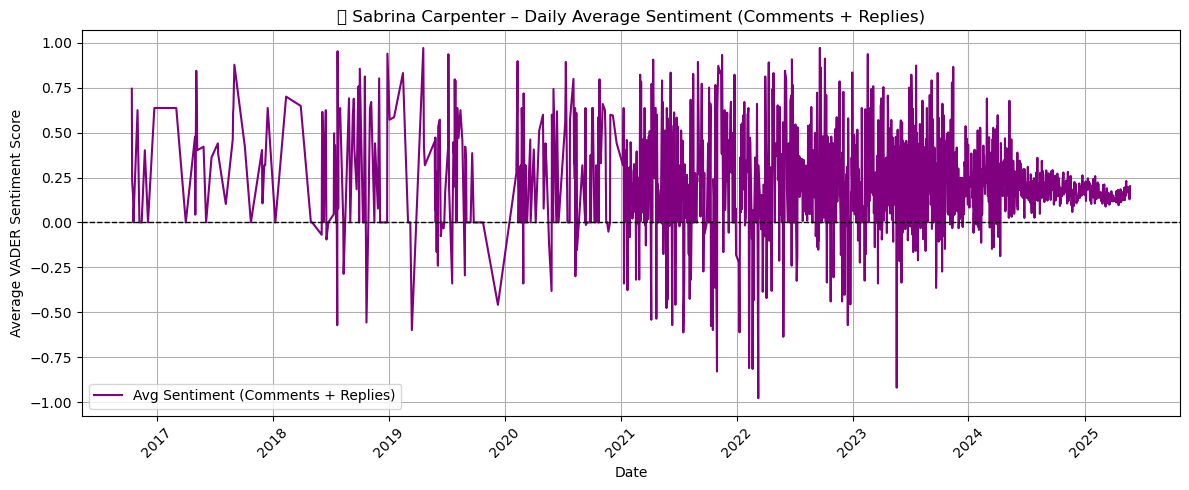

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure both DataFrames exist and have proper datetime
comments['published_at'] = pd.to_datetime(comments['published_at'], errors='coerce')
replies['published_at'] = pd.to_datetime(replies['published_at'], errors='coerce')

# Drop null timestamps or vader scores
comments = comments.dropna(subset=['published_at', 'vader_score'])
replies = replies.dropna(subset=['published_at', 'vader_score'])

# Create unified 'date' column
comments['date'] = comments['published_at'].dt.date
replies['date'] = replies['published_at'].dt.date

# Keep only relevant columns for both
comments_sub = comments[['date', 'vader_score']]
replies_sub = replies[['date', 'vader_score']]

# Combine comments and replies
combined_df = pd.concat([comments_sub, replies_sub], ignore_index=True)

# Compute daily average sentiment
daily_sentiment = combined_df.groupby('date')['vader_score'].mean().reset_index()

# Plot
plt.figure(figsize=(12, 5))
plt.plot(daily_sentiment['date'], daily_sentiment['vader_score'], label='Avg Sentiment (Comments + Replies)', color='purple')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.title("📈 Sabrina Carpenter – Daily Average Sentiment (Comments + Replies)")
plt.xlabel("Date")
plt.ylabel("Average VADER Sentiment Score")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_sentiment_analysis(df, label, time_col):
    df[time_col] = pd.to_datetime(df[time_col], errors='coerce')
    df = df.dropna(subset=[time_col])  # Remove rows with invalid/missing timestamps

    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    fig.suptitle(f"{label} Sentiment Analysis", fontsize=16)

    # Histogram
    sns.countplot(data=df, x='sentiment', ax=axes[0], palette='Set2', order=['positive', 'neutral', 'negative'])
    axes[0].set_title("Sentiment Distribution")
    axes[0].set_xlabel("Sentiment")
    axes[0].set_ylabel("Count")

    # Sentiment over time
    df['date'] = df[time_col].dt.date
    sentiment_timeline = df.groupby(['date', 'sentiment']).size().unstack(fill_value=0)
    sentiment_timeline.plot(ax=axes[1], marker='o')

    axes[1].set_title("Sentiment Over Time")
    axes[1].set_xlabel("Date")
    axes[1].set_ylabel("Number of Entries")
    axes[1].tick_params(axis='x', rotation=45)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_sentiment_analysis(df, label, time_col):
    df[time_col] = pd.to_datetime(df[time_col], errors='coerce')
    df = df.dropna(subset=[time_col])  # Remove rows with invalid/missing timestamps

    # Optional: Map sentiment labels to numeric scores
    sentiment_map = {'positive': 1, 'neutral': 0, 'negative': -1}
    df['sentiment_score'] = df['sentiment'].map(sentiment_map)

    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    fig.suptitle(f"{label} Sentiment Analysis", fontsize=16)

    # Sentiment Distribution
    sns.countplot(data=df, x='sentiment', ax=axes[0], palette='Set2', order=['positive', 'neutral', 'negative'])
    axes[0].set_title("Sentiment Distribution")
    axes[0].set_xlabel("Sentiment")
    axes[0].set_ylabel("Count")

    # Average Sentiment Score Over Time
    #df['date'] = df[time_col].dt.date
    #daily_avg = df.groupby('date')['sentiment_score'].mean()
    #df.set_index(time_col, inplace=True)
    #monthly_avg = df['sentiment_score'].resample('M').mean()
    #axes[1].plot(monthly_avg.index, monthly_avg.values, label='Monthly Avg')
    df.set_index(time_col, inplace=True)
    monthly_avg = df['sentiment_score'].resample('M').mean()
    axes[1].plot(monthly_avg.index, monthly_avg.values, color='orange', marker='o')
   
    axes[1].plot(monthly_avg.index, monthly_avg.values, marker='o', linestyle='-')
    axes[1].set_title("Average Sentiment Score Over Time")
    axes[1].set_xlabel("Date")
    axes[1].set_ylabel("Average Sentiment Score")
    axes[1].tick_params(axis='x', rotation=45)
    axes[1].axhline(y=0, color='gray', linestyle='--', linewidth=0.8)  # Neutral baseline

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


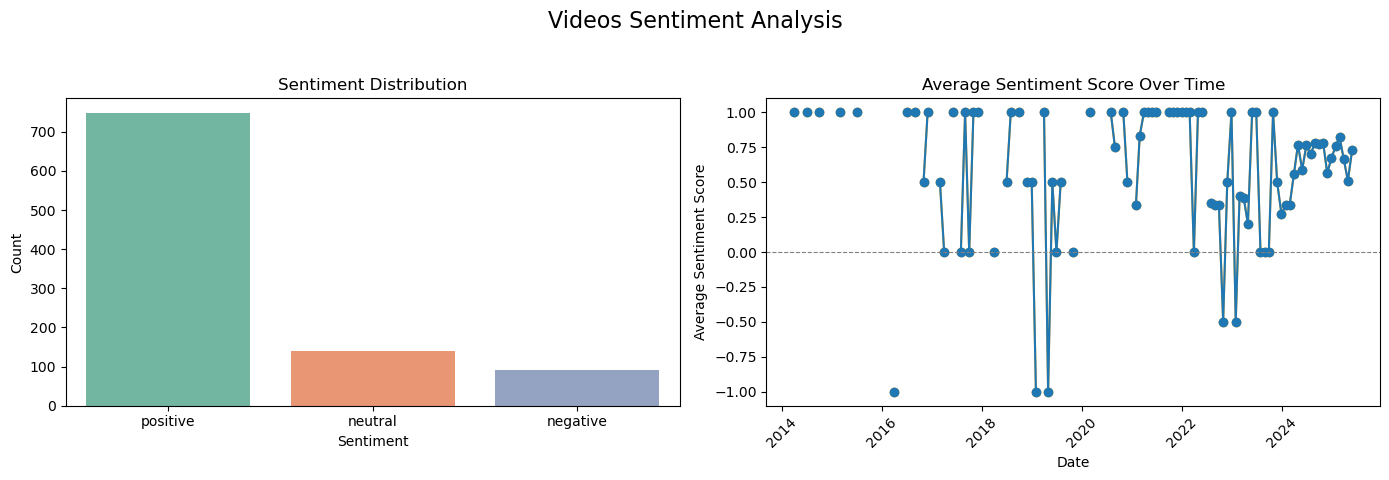

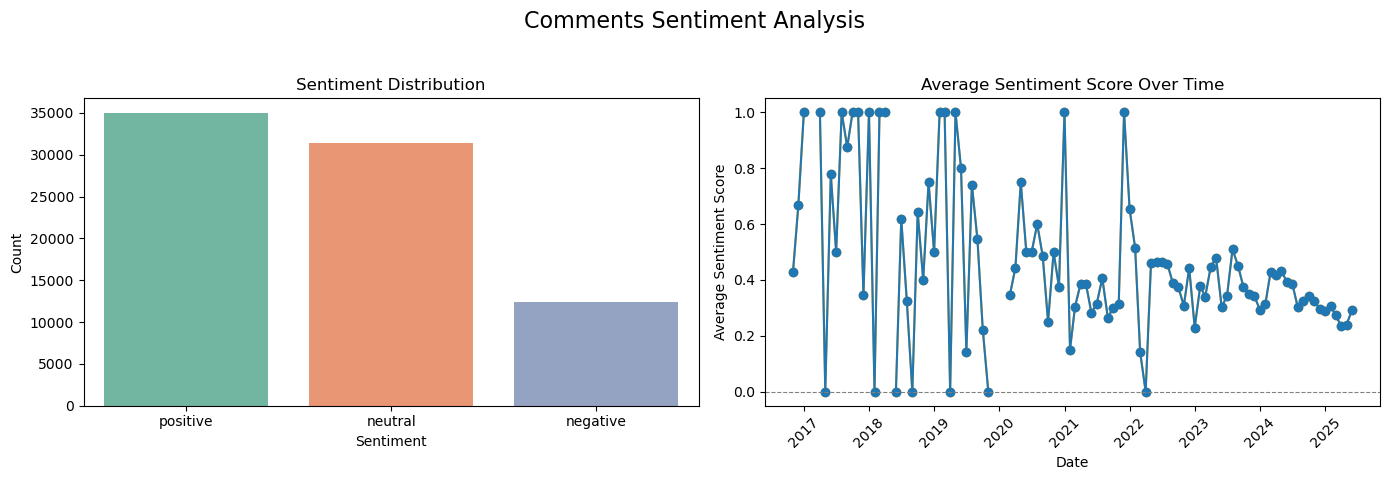

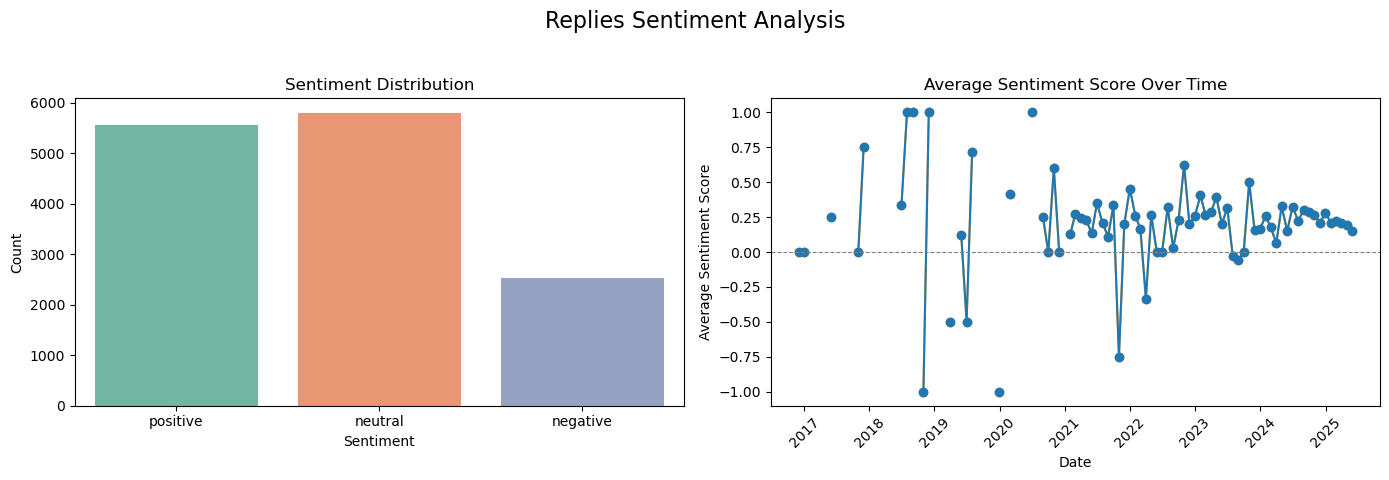

In [26]:
plot_sentiment_analysis(videos, "Videos", "published")
plot_sentiment_analysis(comments, "Comments", "published_at")
plot_sentiment_analysis(replies, "Replies", "published_at")

